In [138]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix


cs = pd.read_csv("CarseatSales.csv", sep=',', header=0)
cs


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [139]:
# categorizing cols
# cs['ShelveLoc'] = cs['ShelveLoc'].astype('category').cat.codes

cs['ShelveLoc'] = cs['ShelveLoc'].replace({'Bad': 0})
cs['ShelveLoc'] = cs['ShelveLoc'].replace({'Medium': 1})
cs['ShelveLoc'] = cs['ShelveLoc'].replace({'Good': 2})
cs['Urban'] = cs['Urban'].astype('category').cat.codes
cs['US'] = cs['US'].astype('category').cat.codes

cs

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


/Users/Kimberly/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


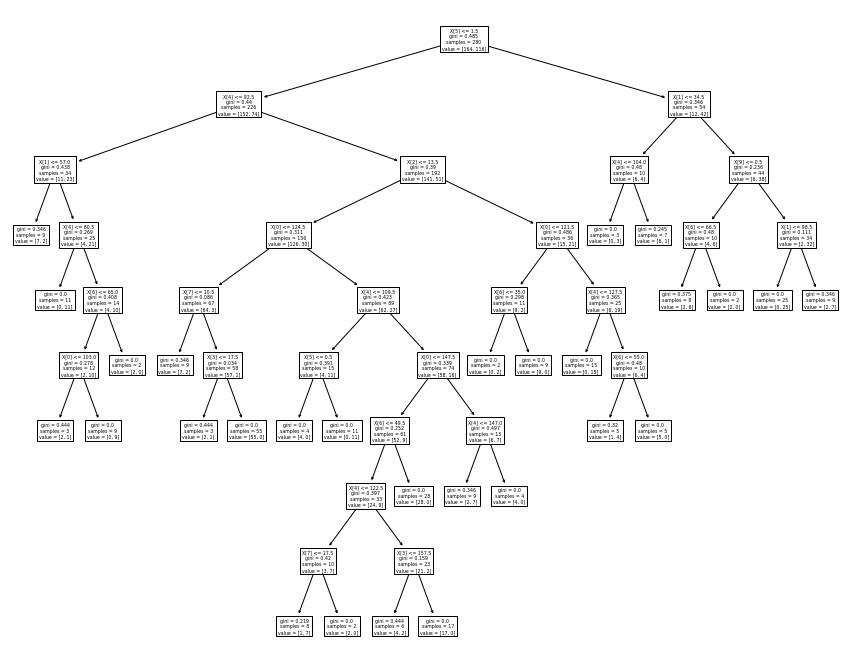

In [140]:
# 1-1

y=(cs['Sales']>8).astype(int)
X=cs[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)  

# fit 
clf = tree.DecisionTreeClassifier(class_weight=None, 
                                  criterion='gini', 
                                  max_depth=10, 
                                  max_features=None, 
                                  max_leaf_nodes=None, 
                                  min_samples_leaf=2, 
                                  min_samples_split=10, 
                                  min_weight_fraction_leaf=0.0, 
                                  presort=False, 
                                  random_state=100, 
                                  splitter='best')
clf = clf.fit(X_train, y_train) 

# export estimated tree into dot graphic file
dot_data = tree.export_graphviz(clf, out_file='Dtree.dot', feature_names=X.columns)

# plot
plt.figure(figsize=(15,12))
tree.plot_tree(clf);

In [141]:
# 1-2

y_pred = clf.predict(X_test)  
print(metrics.confusion_matrix(y_test, y_pred)) 
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))

[[60 12]
 [ 8 40]]
Accuracy:  0.8333333333333334
Precision:  0.7692307692307693
Recall:  0.8333333333333334


/Users/Kimberly/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


[[61 11]
 [ 7 41]]
Accuracy:  0.85
Precision:  0.7884615384615384
Recall:  0.8541666666666666


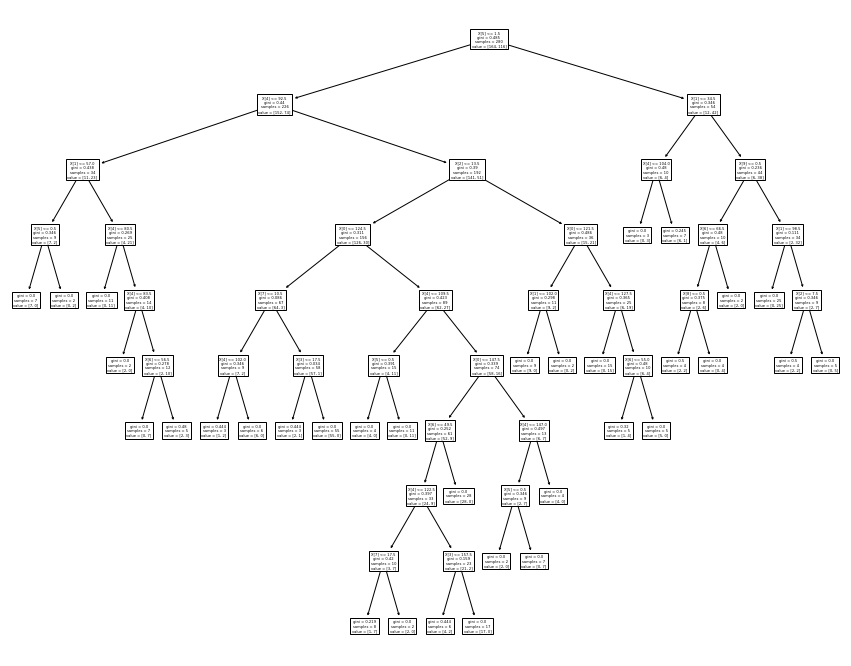

In [144]:
# 1-3 

clf2 = tree.DecisionTreeClassifier(class_weight=None, 
                                  criterion='gini', 
                                  max_depth=9, 
                                  max_features=None, 
                                  max_leaf_nodes=None, 
                                  min_samples_leaf=2, 
                                  min_samples_split=8, 
                                  presort=False, 
                                  random_state=100, 
                                  splitter='best')
clf2 = clf2.fit(X_train, y_train) 

y_pred2 = clf2.predict(X_test)  
print(metrics.confusion_matrix(y_test, y_pred2)) 
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred2))
print('Precision: ', metrics.precision_score(y_test, y_pred2))
print('Recall: ', metrics.recall_score(y_test, y_pred2))

plt.figure(figsize=(15,12))
tree.plot_tree(clf2);



In [168]:
# 2-1
"""
Try to fit a logistic regression model in order to predict whether sales will exceed 8 or not. 
(Make sure to exclude Sales from the model).  Explain the result. 
"""
cs['intercept'] = 1.0

y=(cs['Sales']>8).astype(int)
X=cs[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US', 'intercept']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=109)


from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

y_pred=logmodel.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.91
[[66  6]
 [ 5 43]]


/Users/Kimberly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [161]:
# 2-2

print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred)) 
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.92      0.92        72
           1       0.88      0.90      0.89        48

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120

[[66  6]
 [ 5 43]]
Accuracy:  0.9083333333333333
Precision:  0.8775510204081632
Recall:  0.8958333333333334
